<center><span style="font-size:20px;font-weight:bold;color:black;">时间序列第三章作业</span></center>
$\quad$
<center>朱强强</center>
<center>17064001</center>
<center>应用统计学1701</center>

考虑从1976年1月到2011年9月加利福尼亚和美国的月失业率。    
（a）为加利福尼亚州月失业率建立一个纯时间序列模型，进行模型检验，并简单写出拟合的模型。         
（b）对于加利福尼亚州月失业率，建立一个时间序列模型，使用美国月失业率的1阶滞后作为解释变量，进行模型检验，并写出拟合的模型。      
（c）预测期从2008年1月到2011年9月，使用样本外预测，并比较两个模型。

In [1]:
da <- read.table("data/m-CAUS-7611.txt", header = T)
dim(da)
head(da)

[1] 429   4

year,mon,CA,US
1976,1,9.3,7.9
1976,2,9.1,7.7
1976,3,9.0,7.6
1976,4,8.9,7.7
1976,5,8.9,7.4
1976,6,8.9,7.6


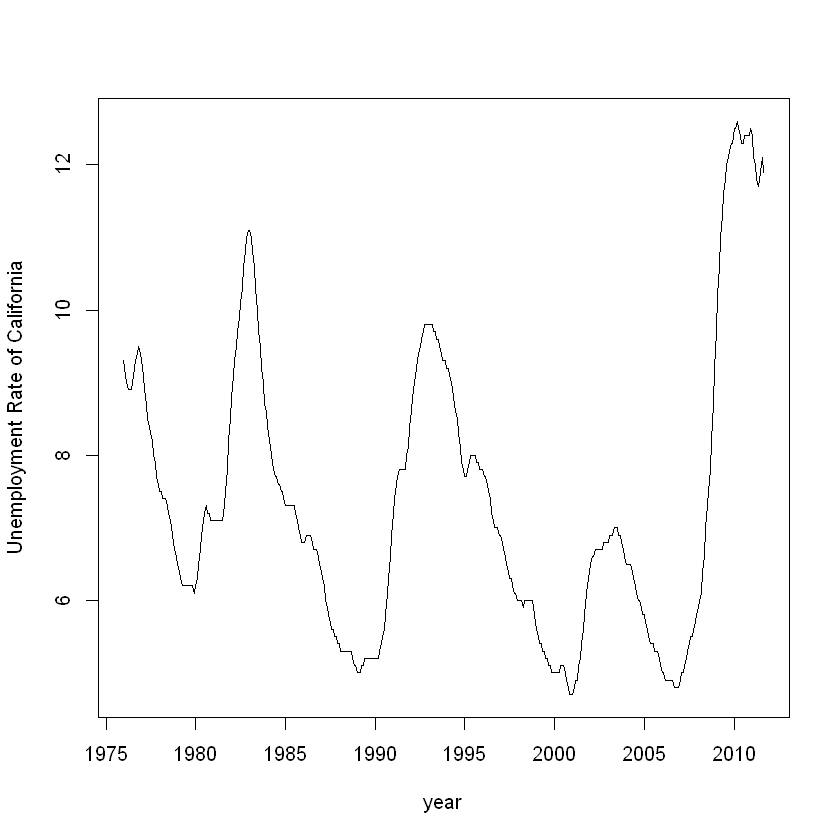

In [2]:
unemp.ca <- da$CA
unemp.us <- da$US
unrate.ca <- ts(unemp.ca, frequency = 12, start = c(1976, 1))
unrate.us <- ts(unemp.us, frequency = 12, start = c(1976, 1))
plot(unrate.ca, xlab = "year", ylab = "Unemployment Rate of California", type = "l")

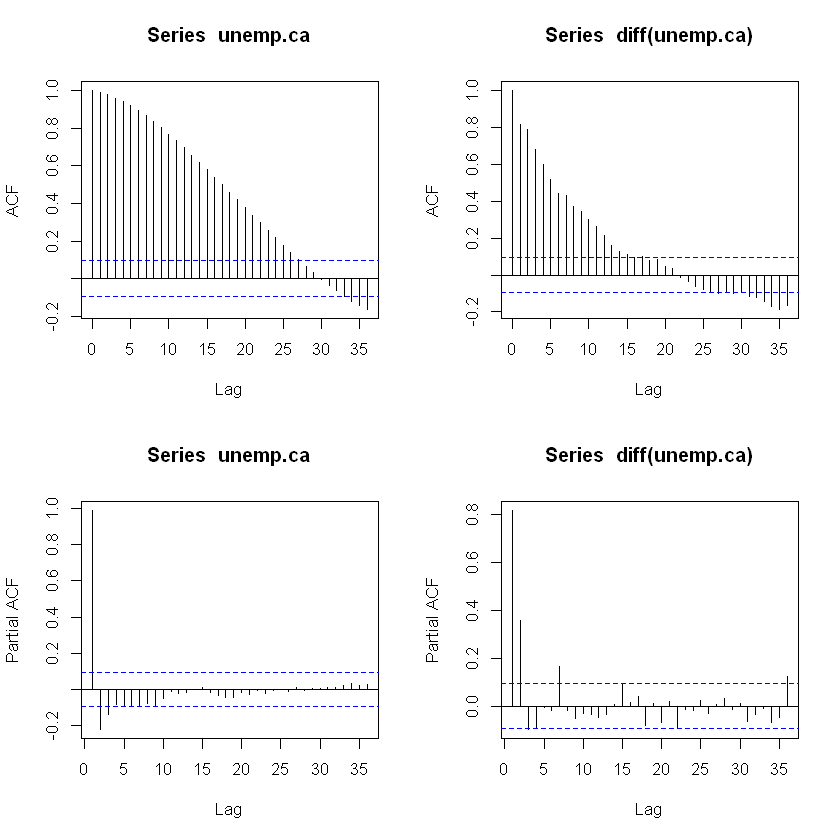

In [3]:
par(mfcol = c(2, 2))
par(mfcol = c(2, 2))
acf(unemp.ca, lag = 36)
pacf(unemp.ca, lag = 36)
acf(diff(unemp.ca), lag = 36)
pacf(diff(unemp.ca), lag = 36)

假设$x_t$为月失业率，我们对差分序列$(1-B)x_t$使用一个周期为12的季节ARMA(1, 1)模型。

In [4]:
m1 <- arima(unemp.ca, order = c(0, 1, 0), seasonal = list(order = c(1, 0, 1), period = 12))
m1


Call:
arima(x = unemp.ca, order = c(0, 1, 0), seasonal = list(order = c(1, 0, 1), 
    period = 12))

Coefficients:
         sar1    sma1
      -0.0310  0.2724
s.e.   0.1686  0.1601

sigma^2 estimated as 0.0177:  log likelihood = 255.61,  aic = -505.22

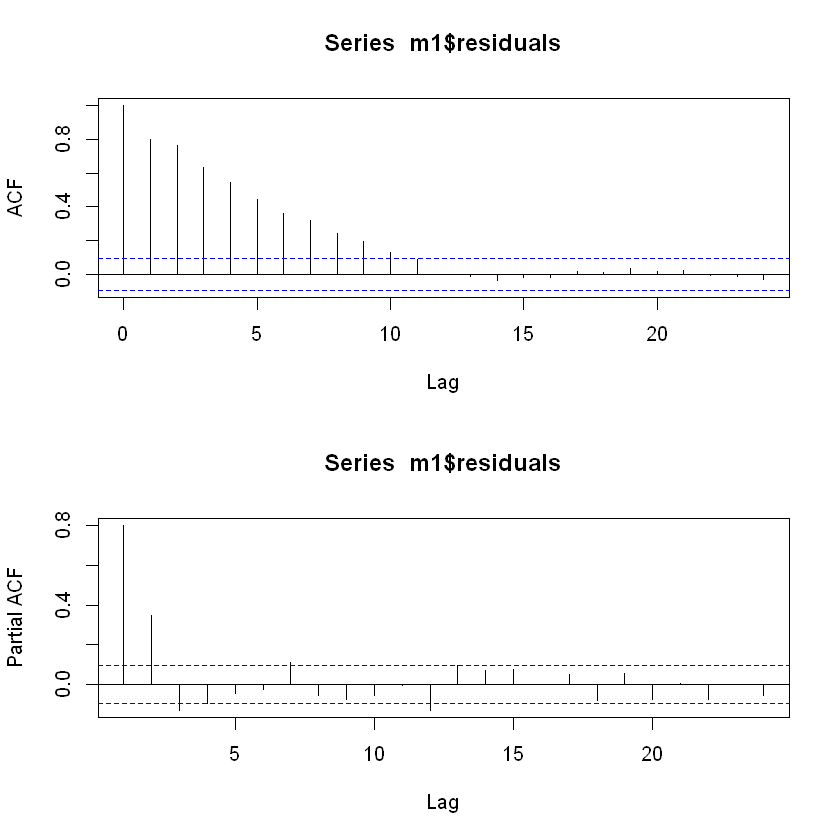

In [5]:
par(mfcol = c(2, 1))
acf(m1$residuals, lag = 24)
pacf(m1$residuals, lag = 24)

由残差的ACF图和PACF图可知，对于失业率来说，该模型并不充分，但是这里的残差大约消除了季节性。我们考虑对该模型残差建立一个ARMA模型。

In [6]:
library(TSA)
eacf(m1$residuals, 6, 12)


Attaching package: 'TSA'

The following objects are masked from 'package:stats':

    acf, arima

The following object is masked from 'package:utils':

    tar



AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12
0 x x x x x x x x x x o  o  o 
1 x x o o o x x o o o o  o  o 
2 x x x o o o x o o o o  o  o 
3 x x o x o o o o o o o  o  o 
4 x x o x o o o o o o x  o  o 
5 o o x x o o o o o o x  o  o 
6 o x x o x o o o o o o  o  o 


由eacf命令我们可以对残差得到一个ARMA(1, 2)模型，然后对失业率模型进行改进。

In [7]:
m1 <- arima(unemp.ca, order = c(1, 1, 2), seasonal = list(order = c(1, 0, 1), period = 12))
m1


Call:
arima(x = unemp.ca, order = c(1, 1, 2), seasonal = list(order = c(1, 0, 1), 
    period = 12))

Coefficients:
         ar1      ma1     ma2     sar1    sma1
      0.8600  -0.3035  0.3035  -0.8503  0.9078
s.e.  0.0299   0.0546  0.0513   0.1356  0.1148

sigma^2 estimated as 0.005115:  log likelihood = 520.51,  aic = -1031.02

拟合的模型为：
     
<span class="mark">$$
(1-0.86B)(1+0.85B^{12})(1-B)x_t=(1-0.30B+0.30B^2)(1+0.91B^{12})a_t
$$</span>
    

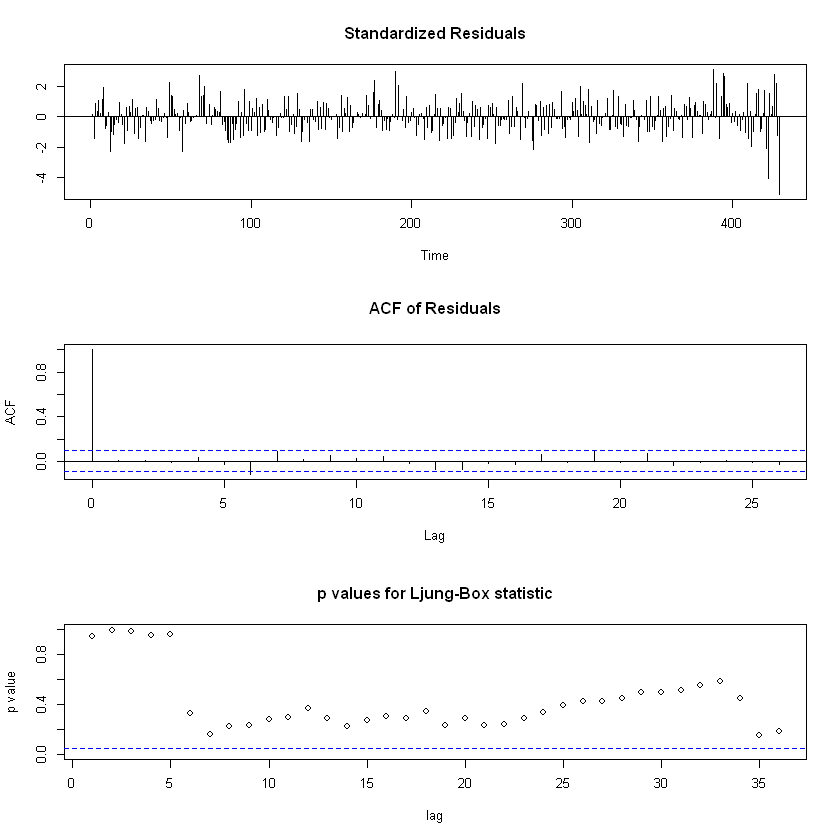

In [8]:
tsdiag(m1, gof = 36)

由检验图可知，模型通过Ljung-Box检验，模型是显著的。

In [9]:
dim(da)
head(da)

[1] 429   4

year,mon,CA,US
1976,1,9.3,7.9
1976,2,9.1,7.7
1976,3,9.0,7.6
1976,4,8.9,7.7
1976,5,8.9,7.4
1976,6,8.9,7.6


In [10]:
unemp.ca.new <- da$CA[1:428]
unemp.us.new <- da$US[2:429]

In [11]:
nm <- lm(unemp.ca.new ~ unemp.us.new, data = da)
summary(nm)


Call:
lm(formula = unemp.ca.new ~ unemp.us.new, data = da)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.84873 -0.83205 -0.05379  0.62447  2.31938 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.34218    0.18780   1.822   0.0692 .  
unemp.us.new  1.09421    0.02848  38.415   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9399 on 426 degrees of freedom
Multiple R-squared:  0.776,	Adjusted R-squared:  0.7755 
F-statistic:  1476 on 1 and 426 DF,  p-value: < 2.2e-16


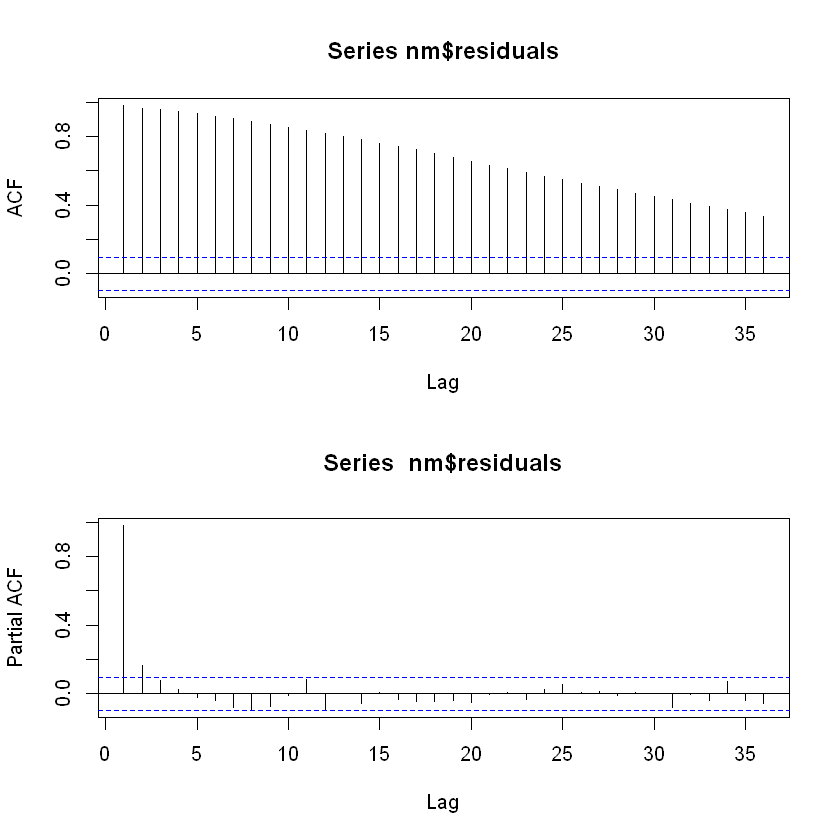

In [12]:
par(mfcol = c(2, 1))
acf(nm$residuals, lag = 36)
pacf(nm$residuals, lag = 36)

由上图我们可知AR的阶数p满足$p\ge 2$。且系相关函数没有表现出任何明显的指数衰减或下降的正弦函数模式。这表明MA的阶数q是正的。我们试着用q=2来设定该模型。

In [14]:
m2 <- arima(unemp.ca.new, order = c(2, 0, 2), seasonal = list(order = c(1, 0, 1), period = 12), xreg = unemp.us.new)
m2


Call:
arima(x = unemp.ca.new, order = c(2, 0, 2), seasonal = list(order = c(1, 0, 
    1), period = 12), xreg = unemp.us.new)

Coefficients:
         ar1      ar2      ma1     ma2     sar1    sma1  intercept    xreg
      1.8724  -0.8762  -0.3574  0.3246  -0.9192  0.9679     7.6722  0.0247
s.e.  0.0276   0.0277   0.0522  0.0495   0.0945  0.0918     0.8474  0.0180

sigma^2 estimated as 0.004708:  log likelihood = 533.94,  aic = -1051.87

假设美国失业率为$w_t$。
拟合的模型为：
     
<span class="mark">$$
(1-1.87B+0.88B^2)(1+0.92B^{12})(x_t-7.67-0.025w_{t-1})=(1-0.36B+0.32B^2)(1+0.97B^{12})a_t
$$</span>
   

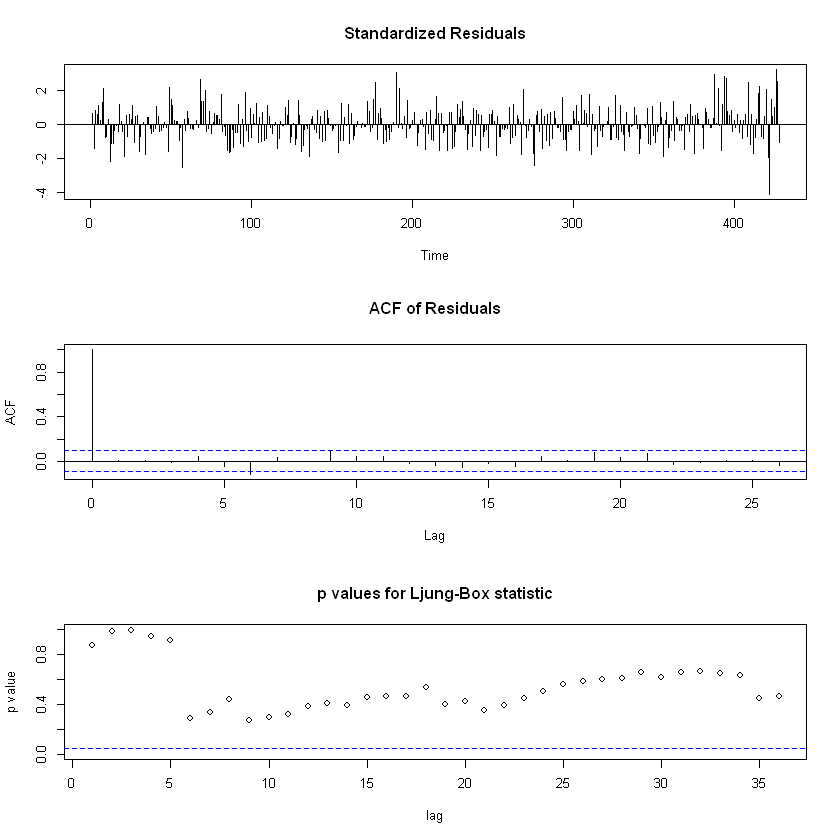

In [15]:
tsdiag(m2, gof = 36)

由检验图可知，模型通过Ljung-Box检验，模型是显著的。

In [16]:
source("backtest.R")
pm1 <- backtest(m1, unemp.ca.new, 384, 1, inc.mean = F)

[1] "RMSE of out-of-sample forecasts"
[1] 0.1095172
[1] "Mean absolute error of out-of-sample forecasts"
[1] 0.08135214


In [19]:
pm2 <- backtest(m2, unemp.ca.new, 384, 1, xre = unemp.us.new)

Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"

[1] "RMSE of out-of-sample forecasts"
[1] 0.1117163
[1] "Mean absolute error of out-of-sample forecasts"
[1] 0.08459128
